In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First thing first, i read the artist_data.csv and the artwork_data.csv in pandas.

In [22]:
artist_df = pd.read_csv('/Users/lisaraulli/Desktop/University/collecting_data/lab/assignment_4/artist_data.csv', delimiter = ',', encoding='utf-8')
artist_df.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


In [102]:
artwork_df = pd.read_csv('/Users/lisaraulli/Desktop/University/collecting_data/lab/assignment_4/artwork_data.csv', delimiter = ',', encoding='utf-8')
artwork_df.sample(10)

/var/folders/jp/dq94s43x0q769c4l5nhts8bw0000gn/T/ipykernel_3005/737116095.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  artwork_df = pd.read_csv('/Users/lisaraulli/Desktop/University/collecting_data/lab/assignment_4/artwork_data.csv', delimiter = ',', encoding='utf-8')


,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
41470,4233,N02072,"Farquharson, David",artist,177,Birnam Wood,1906,Oil paint on canvas,Presented by the Trustees of the Chantrey Bequ...,1906.0,1906.0,support: 1676 x 2444 mm frame: 2052mm x 2816mm,1676,2444,NaN,mm,date inscribed,NaN,http://www.tate.org.uk/art/images/work/N/N02/N...,http://www.tate.org.uk/art/artworks/farquharso...
51349,79843,P12003,"Bjørlo, Per Inge",artist,6500,Head VI,1998,"Drypoint, aquatint and etching on paper",Presented by Tyler Graphics Ltd in honour of P...,1998.0,2004.0,image: 282 x 229 mm,282,229,NaN,mm,NaN,© Per Inge Bjørlo,http://www.tate.org.uk/art/images/work/P/P12/P...,http://www.tate.org.uk/art/artworks/bjrlo-head...
33695,58332,D31093,"Turner, Joseph Mallord William",artist,558,Stettin: View across the Oder to St James’s an...,1835,Graphite on paper,Accepted by the nation as part of the Turner B...,1835.0,1856.0,support: 162 x 89 mm,162,89,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D31/D...,http://www.tate.org.uk/art/artworks/turner-ste...
38,1073,A00039,"Blake, William",artist,39,‘Songs of Innocence’: Title-Page,"1789, reprinted 1831 or later",Relief etching on paper,Presented by Mrs John Richmond 1922,1789.0,1922.0,image: 120 x 64 mm,120,64.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-song...
59656,6270,T04223,"Highmore, Joseph",artist,256,Head of James Harris of Salisbury,date not known,Ink and watercolour on paper,Presented by Mrs Joan Highmore Blackhall and D...,NaN,1986.0,support: 196 x 125 mm,196,125,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/T/T04/T...,http://www.tate.org.uk/art/artworks/highmore-h...
55050,103092,P79723,"Hume, Gary",artist,2403,Untitled 03,2006,Linocut print on paper,Presented by the artist 2008,2006.0,2009.0,image: 555 x 400 mm,555,400,NaN,mm,NaN,© Gary Hume,http://www.tate.org.uk/art/images/work/P/P79/P...,http://www.tate.org.uk/art/artworks/hume-untit...
23516,48127,D20784,"Turner, Joseph Mallord William",artist,558,"London Bridge in Course of Construction, with ...",c.1827,Graphite on paper,Accepted by the nation as part of the Turner B...,1827.0,1856.0,support: 110 x 185 mm,110,185.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D20/D...,http://www.tate.org.uk/art/artworks/turner-lon...
28900,53526,D26189,"Turner, Joseph Mallord William",artist,558,The River Tweed near Abbotsford and Eildon Hill,1834,Graphite on paper,Accepted by the nation as part of the Turner B...,1834.0,1856.0,support: 111 x 181 mm,111,181.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D26/D...,http://www.tate.org.uk/art/artworks/turner-the...
36522,61166,D33998,"Turner, Joseph Mallord William",artist,558,Arches of a Ruined Aqueduct,c.1830–41,Graphite on paper,Accepted by the nation as part of the Turner B...,1830.0,1856.0,support: 153 x 224 mm,153,224,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D33/D...,http://www.tate.org.uk/art/artworks/turner-arc...
31167,55796,D28477,"Turner, Joseph Mallord William",artist,558,Distant View of the Rhine from the Hills above...,1839,Graphite on paper,Accepted by the nation as part of the Turner B...,1839.0,1856.0,support: 100 x 163 mm,100,163.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D28/D...,http://www.tate.org.uk/art/artworks/turner-dis...


I noticed that the two datasets are related by the column with artits' unique idenfiers. However, the two columns in the datasets have different names. Therefore, i changed the column name in the arsists dataset for eventual merging purposes.

In [97]:
artist_df = artist_df.rename(columns={'id': 'artistId'})

Using the function describe i wanted to have a first insight at the data contained in my the datasets.

In [93]:
artist_df.describe(include='all')

,artistId,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
count,3532.000000,3532,3416,3470,3472.000000,2228.000000,3040,1453,3532
unique,NaN,3526,2,2104,NaN,NaN,1263,515,3532
top,NaN,"Stokes, Adrian",Male,born 1967,NaN,NaN,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/magdalena-a...
freq,NaN,2,2895,42,NaN,NaN,446,443,1
mean,3330.331257,NaN,NaN,NaN,1887.001440,1921.356822,NaN,NaN,NaN
std,4160.172543,NaN,NaN,NaN,77.140335,79.520671,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1497.000000,1543.000000,NaN,NaN,NaN
25%,885.750000,NaN,NaN,NaN,1855.000000,1876.000000,NaN,NaN,NaN
50%,1772.500000,NaN,NaN,NaN,1910.000000,1944.000000,NaN,NaN,NaN
75%,2676.250000,NaN,NaN,NaN,1941.000000,1983.000000,NaN,NaN,NaN


In [25]:
artwork_df.describe(include='all')

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
count,69201.000000,69201,69201,69201,69201.000000,69201,69201,62817,69198,63823.0,69156.000000,66768,65860,65860.0,2514.000000,65860,6306,14239,58415,69201
unique,NaN,69201,3336,19,NaN,43531,2736,3413,3245,546.0,NaN,25600,1978,3072.0,NaN,1,1,1221,58415,69201
top,NaN,A00001,"Turner, Joseph Mallord William",artist,NaN,[title not known],date not known,Graphite on paper,Accepted by the nation as part of the Turner B...,1819.0,NaN,support: 113 x 189 mm,113,185.0,NaN,mm,date inscribed,"© DACS, 2014",http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
freq,NaN,1,39389,66907,NaN,3572,5974,26167,37893,3090.0,NaN,817,2096,1318.0,NaN,65860,6306,803,1,1
mean,39148.026213,NaN,NaN,NaN,1201.063251,NaN,NaN,NaN,NaN,NaN,1910.646856,NaN,NaN,NaN,479.197772,NaN,NaN,NaN,NaN,NaN
std,25980.468687,NaN,NaN,NaN,2019.422535,NaN,NaN,NaN,NaN,NaN,64.202148,NaN,NaN,NaN,1051.141734,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1823.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,19096.000000,NaN,NaN,NaN,558.000000,NaN,NaN,NaN,NaN,NaN,1856.000000,NaN,NaN,NaN,48.250000,NaN,NaN,NaN,NaN,NaN
50%,37339.000000,NaN,NaN,NaN,558.000000,NaN,NaN,NaN,NaN,NaN,1856.000000,NaN,NaN,NaN,190.000000,NaN,NaN,NaN,NaN,NaN
75%,54712.000000,NaN,NaN,NaN,1137.000000,NaN,NaN,NaN,NaN,NaN,1982.000000,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,NaN,NaN


One aspect that I think is interesting to visualise, as in so many other areas, is the presence of representatives of both sexes. From this graph, we can see that the Tate recorded mainly male artists.

<AxesSubplot:>

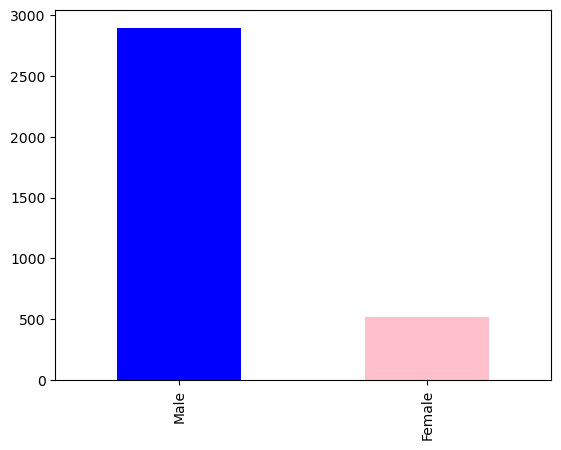

In [160]:
gender_representation = artist_df['gender'].value_counts()
gender_representation.plot(kind='bar', color=['blue', 'pink'])

Tate Britain is home to the largest collection of works by Joseph Mallord William Turner (1775–1851).

In [30]:
artwork_df['artist'].value_counts().nlargest(10)

Turner, Joseph Mallord William    39389
Jones, George                      1046
Moore, Henry, OM, CH                623
Daniell, William                    612
Beuys, Joseph                       578
British (?) School                  388
Paolozzi, Sir Eduardo               385
Flaxman, John                       287
Phillips, Esq Tom                   274
Warhol, Andy                        272
Name: artist, dtype: int64

In what proportion is he present if compare to all the works in the museum? The total number of works corresponds to the total number of rows in the dataset. 

In [194]:
39389 / artwork_df.shape[0] * 100

56.919697692229875

It appears that more than 50% of the museum's inventory consists of works by a single artist.

And not unexpectedly, being a museum located in the UK, most of the registered artists were born there.

In [110]:
artist_df['placeOfBirth'].value_counts().nlargest()

London, United Kingdom       446
Paris, France                 57
Edinburgh, United Kingdom     47
New York, United States       43
Glasgow, United Kingdom       35
Name: placeOfBirth, dtype: int64

Combining the two datasets on the values they have in common, in this case the artist id, may allow further observations to be made.

In [94]:
artwork_artist_df = artist_df.merge(artwork_df, on='artistId')
artwork_artist_df.sample(5)

,artistId,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_x,id,...,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url_y
11989,1251,"Hartung, Hans",Male,1904–1989,1904.0,1989.0,"Leipzig, Deutschland","Antibes, France",http://www.tate.org.uk/art/artists/hans-hartun...,5858,...,1986.0,image: 520 x 320 mm,520,320,NaN,mm,NaN,© The estate of Hans Hartung,http://www.tate.org.uk/art/images/work/P/P77/P...,http://www.tate.org.uk/art/artworks/hartung-l1...
42477,558,"Turner, Joseph Mallord William",Male,1775–1851,1775.0,1851.0,"London, United Kingdom","Chelsea, United Kingdom",http://www.tate.org.uk/art/artists/joseph-mall...,42386,...,1856.0,support: 112 x 186 mm,112,186.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D15/D...,http://www.tate.org.uk/art/artworks/turner-the...
68567,2155,"Winters, Terry",Male,born 1949,1949.0,NaN,"Brooklyn, United States",NaN,http://www.tate.org.uk/art/artists/terry-winte...,22164,...,1997.0,image: 210 x 160 mm,210,160,NaN,mm,NaN,© Terry Winters,http://www.tate.org.uk/art/images/work/P/P11/P...,http://www.tate.org.uk/art/artworks/winters-fi...
14447,300,"Jones, George",Male,1786–1869,1786.0,1869.0,NaN,NaN,http://www.tate.org.uk/art/artists/george-jone...,7478,...,1888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/jones-titl...
14478,300,"Jones, George",Male,1786–1869,1786.0,1869.0,NaN,NaN,http://www.tate.org.uk/art/artists/george-jone...,7509,...,1888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/jones-titl...


When merging two datasets, it may also happen that some column names lose their meaning. That is why it may be useful to rename them.

In [98]:
artwork_artist_df = artwork_artist_df.rename(columns={'id': 'artworkId', 
                                                      'url_x': 'url_artist',
                                                      'url_y': 'url_artwork'})

Merging two datasets may result in the duplication of some columns, so it is advisable to clean the resulting dataset.

In [100]:
artwork_artist_df = artwork_artist_df.drop(['artist'], axis=1)

In [101]:
artwork_artist_df.columns

Index(['artistId', 'name', 'gender', 'dates', 'yearOfBirth', 'yearOfDeath',
       'placeOfBirth', 'placeOfDeath', 'url_artist', 'artworkId',
       'accession_number', 'artistRole', 'title', 'dateText', 'medium',
       'creditLine', 'year', 'acquisitionYear', 'dimensions', 'width',
       'height', 'depth', 'units', 'inscription', 'thumbnailCopyright',
       'thumbnailUrl', 'url_artwork'],
      dtype='object')

Finally, one may actually also consider eliminating from the resulting dataset all columns containing duplicated values or those that are not useful for one's research project.

In [213]:
cleaned_artwork_artist_df = artwork_artist_df.drop(['dates', 
                                                    'url_artist', 
                                                    'dateText', 
                                                    'creditLine', 
                                                    'dimensions',
                                                    'inscription',
                                                    'thumbnailCopyright',
                                                    'thumbnailUrl',
                                                    'url_artwork' ], axis=1)

Despite the predominance of works by male authors, who are the 10 women with the most exhibited works?

In [167]:
women_filter = cleaned_artwork_artist_df['gender'] == 'Female'
women_artworks_df = cleaned_artwork_artist_df[women_filter]
top_women = women_artworks_df.groupby('name')['artistId'].value_counts().sort_values(ascending=False)[:10]

Text(0.5, 0, 'Number of exhibited works')

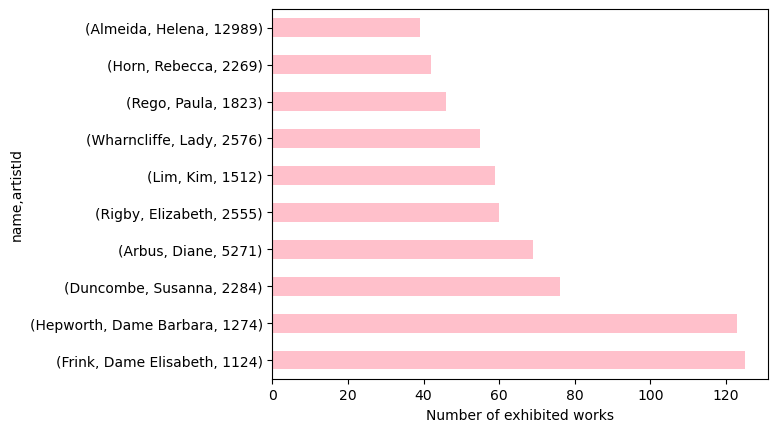

In [185]:
top_women.plot(kind='barh', color='pink')
plt.xlabel("Number of exhibited works")

Tbd: graph dispalying number of works acquired each year, has it increased?